**1. Введение**

В этом модуле мы продолжим изучение библиотеки **Pandas** и рассмотрим более сложные методы работы с данными, которые помогают производить их анализ и подготовку.

**Цели данного модуля:**

→ Научиться сортировать данные.

→ Получить навыки группировки данных и анализа групп.

→ Освоить методы построения сводных таблиц и научиться с их помощью исследовать зависимости в признаках.

→ Научиться работать с данными, представленными в виде нескольких таблиц, и познакомиться с методами их объединения.

**ВСПОМНИМ, С КАКИМИ ДАННЫМИ МЫ РАБОТАЕМ**

**В прошлом модуле мы совершили множество преобразований над нашей таблицей:**

→ удалили столбцы **index** и **Coordinates**;

→ создали признак средней площади одной комнаты **MeanRoomsSquare** и ввели коэффициент соотношения площади здания к площади участка - **AreaRatio**;

→ преобразовали признак даты продажи **Date в формат datetime** и создали на его основе следующие столбцы: номер месяц продажи **(MonthSale)**, номер дня недели продажи **(WeekdaySale)**, «признак-мигалку» выходного дня **(Weekend)**;

→ заменили признак года постройки здания **YearBuilt** на его возраст **AgeBuilding**;

→ извлекли из признака адреса объекта **Address** новый признак подтипа улицы **StreetType** и удалили столбец с адресом;

→ уменьшили число уникальных наименований агентств по недвижимости **(SellerG)**, а также число пригородов **(Suburb)**;

→ выделили категориальные признаки и преобразовали их в тип данных **сategory**;

→ заменили сокращённые названия категорий признака типа объекта **Type** на их полные названия **(h - house, t - townhouse, u - unit)**.

In [3]:
import pandas as pd

melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


Файл подгрузился верно, однако есть один нюанс. Давайте посмотрим на информацию о столбцах с помощью **метода info()**:

In [4]:
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

Обратите внимание, что наше преобразование столбцов к типам **datetime** и **category** «слетело».

**Почему это произошло?**

Ответ на самом деле очень прост: **csv-файл** не хранит в себе информацию о типах данных столбцов, поэтому при чтении **Pandas** автоматически определяет тип данных столбца. Не забывайте об этом, обмениваясь преобразованными данными с вашими коллегами.

***Задание 1.1***

Преобразуйте столбец **Date** в формат **datetime** и выделите квартал **(quarter)** продажи объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве ответа запишите число объектов, проданных в этом квартале.

In [5]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'])
quarters = melb_df['Date'].dt.quarter
print(quarters.value_counts().iloc[1])

4359


***Задание 1.2***

Преобразуйте все столбцы, в которых меньше **150** уникальных значений, в тип данных **category**, исключив из преобразования столбцы **Date, Rooms, Bedroom, Bathroom, Car**.

В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных **category**.

In [6]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] 
max_unique_count = 150 
for col in melb_df.columns: 
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: 
        melb_df[col] = melb_df[col].astype('category')
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

**2. Сортировка данных в DataFrame**

*Часто бывает так, что таблицу или промежуточный результат операций с ней необходимо отсортировать по какому-то критерию. Например, для отчётности вам необходимо предоставить список проданных объектов недвижимости, отсортированный по возрастанию цены или дате продажи. Рассмотрим основные подходы к решению таких задач.*

**МЕТОД SORT_VALUES()**

Для сортировки значений в **DataFrame** по значениям одного или нескольких столбцов используется **метод sort_values()**.

**Основные параметры метода sort_values():**

→ **by** - имя или список имён столбцов, по значениям которых производится сортировка.

→ **axis** - ось, по которой производится сортировка (**0** - строки, **1** - столбцы). По умолчанию сортировка производится по строкам.

→ **ascending** - сортировка по возрастанию (от меньшего к большему). По умолчанию параметр выставлен на **True**, для сортировки по убыванию (от большего к меньшему) необходимо выставить его на **False**.

→ **ignore_index** - создаются ли новые индексы в таблице. По умолчанию выставлен на **False** и сохраняет индексы изначальной таблицы.

→ **inplace** - производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на **False**, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на **True**.

**СОРТИРОВКА ПО ЗНАЧЕНИЯМ ОДНОГО СТОЛБЦА**

Отсортируем таблицу по возрастанию цены объектов недвижимости **(Price)**:

In [7]:
melb_df.sort_values(by='Price').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,...,144.89000,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,...,145.02420,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,...,144.82660,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,...,144.96580,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,...,145.03730,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,...,144.95188,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,...,144.89587,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,...,144.86720,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,...,144.82720,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,...,144.82390,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1


Мы вывели десять строк таблицы, чтобы убедиться в верном порядке сортировки. Также обратите внимание на индексы таблицы - их значения сохранились из исходной таблицы.

А теперь отсортируем таблицу по убыванию (от самой последней до самой первой) даты продажи объекта **(Date)**. Для этого выставим параметр **ascending** на **False**:

In [8]:
melb_df.sort_values(by='Date', ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
11144,Northcote,4,house,1955000.0,SP,McGrath,2017-12-08,5.3,3070,4,...,144.99375,Northern Metropolitan,11364,12.600000,0.923664,12,47,4,St,0
11217,Surrey Hills,3,house,1775000.0,PI,Jellis,2017-12-08,10.2,3127,3,...,145.08968,Southern Metropolitan,5457,15.750000,-0.721854,12,47,4,Rd,0
11206,St Kilda,4,house,1600000.0,VB,Gary,2017-12-08,5.0,3182,4,...,144.98324,Southern Metropolitan,13240,16.000000,-0.586028,12,107,4,St,0
11207,Strathmore,7,house,2000000.0,SP,Nelson,2017-12-08,8.2,3041,7,...,144.90587,Western Metropolitan,3284,20.882353,-0.262721,12,18,4,Rd,0
11208,Strathmore,4,house,1610000.0,S,other,2017-12-08,8.2,3041,4,...,144.92243,Western Metropolitan,3284,24.909091,-0.517181,12,62,4,St,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Camberwell,4,house,2650000.0,S,Jellis,2016-03-09,7.8,3124,4,...,145.06860,Southern Metropolitan,8920,18.900000,-0.550535,3,126,2,Rd,0
4510,Oak Park,3,house,892000.0,S,Nelson,2016-03-09,11.5,3046,3,...,144.91740,Northern Metropolitan,2651,18.000000,-0.714609,3,46,2,St,0
4388,Northcote,3,house,1200000.0,S,Nelson,2016-03-09,5.5,3070,3,...,144.99090,Northern Metropolitan,11364,17.857143,-0.264706,3,96,2,St,0
6184,Surrey Hills,3,house,1205000.0,S,Fletchers,2016-01-28,11.2,3127,3,...,145.10060,Southern Metropolitan,5457,18.000000,-0.590909,1,46,3,Rd,0


**СОРТИРОВКА ПО ЗНАЧЕНИЯМ НЕСКОЛЬКИХ СТОЛБЦОВ**

Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр **by** в виде списка. При этом важно обращать внимание на порядок следования столбцов.

Так, например, отсортируем таблицу сначала по возрастанию расстояния от центра города **(Distance)**, а затем - по возрастанию цены объекта **(Price)**. Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов **Distance** и **Price** результирующей таблицы:

In [9]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


Мы получили таблицу, отсортированную по возрастанию расстояния до центра города. Если встречаются объекты недвижимости, у которых расстояние оказывается одинаковым, то внутри такой группы производится сортировка по цене объекта.

Ради интереса попробуйте поменять порядок следования столбцов в параметре **by** метода **sort_values()** и сравните результат. 

In [10]:
melb_df.sort_values(by=['Price', 'Distance']).loc[::10, ['Price', 'Distance']]

,Price,Distance
2652,85000.0,6.4
7116,200000.0,7.8
5206,220000.0,11.2
7240,241000.0,8.2
2898,250000.0,13.0
...,...,...
13341,4060000.0,6.3
8591,4275000.0,1.5
1094,4700000.0,11.2
5801,5046000.0,6.1


**КОМБИНИРОВАНИЕ СОРТИРОВКИ С ФИЛЬТРАЦИЕЙ**

Предположим, компания **McGrath** поручила нам восстановить хронологию продаж таунхаусов, у которых площадь участка существенно больше площади здания, чтобы понять, как часто компания справляется с таким сложным видом объектов. Объекты, проданные в один и тот же день, мы бы хотели сортировать по значению коэффициента соотношения площадей. 

Найдём информацию о таунхаусах **(Type)**, проданных компанией **(SellerG) McGrath**, у которых коэффициент соотношения площадей здания и участка **(AreaRatio)** меньше **-0.8**. Результат отсортируем по дате продажи **(Date)** в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр **ignore_index** на **True**. Для наглядности результата выберем из таблицы только столбцы **Data** и **AreaRatio**:

In [11]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


Итак, мы рассмотрели основные методы сортировки данных. Сама по себе сортировка используется не так часто, однако в комбинации с другими методами обработки данных она является ценным инструментом. 

***Задание 2.1***

Ознакомившись с документацией по методу **sort_values()**, определите, какой из нижеперечисленных параметров позволяет управлять используемым алгоритмом сортировки:

**Правильный ответ:** **kind** *(За алгоритм сортировки в методе ***sort_values()*** отвечает параметр ***kind***. По умолчанию этот параметр выставлен на значение ***quicksort*** (используется алгоритм быстрой сортировки))*

***Задание 2.2***

Произведите сортировку столбца **AreaRatio** по убыванию. При этом индексы полученной таблицы замените на новые. Какое значение площади здания находится в строке **1558?**

In [12]:
int(melb_df.sort_values(
    by='AreaRatio', 
    ignore_index=True,
    ascending=False
).loc[1558, 'BuildingArea'])

126

***Задание 2.3***

Найдите таунхаусы **(Type)** с количеством жилых комнат **(Rooms)** больше **2**. Отсортируйте полученную таблицу сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат **(MeanRoomsSquare)**. Индексы таблицы замените на новые. Какая цена будет у объекта в строке **18?**

In [13]:
mask1 = melb_df['Type'] == 'townhouse'
mask2 = melb_df['Rooms'] > 2
int(melb_df[mask1&mask2].sort_values(
    by=['Rooms', 'MeanRoomsSquare'],
    ascending=[True, False],
    ignore_index=True
).loc[18, 'Price'])

1300000

**3. Группировка данных в DataFrame**

Одна из основных задач анализа данных - это **группировка данных и сравнение показателей в группах**. Например, нам необходимо сравнить средний уровень заработной платы в зависимости от пола/уровня образования. Или же мы хотим проследить, какая группа клиентов приносит нам наибольший доход, чтобы направить своё внимание на эту группу.

**Владение группировкой - важный навык, который открывает новые возможности по работе с данными.**

**МЕТОД GROUPBY()**

В библиотеке Pandas для группировки данных по одному или нескольким признакам можно использовать метод **groupby()**.

**Основные параметры метода groupby():**

→ **by** - имя или список имён столбцов, по которым производится группировка.

→ **axis** - ось, по которой производится группировка (**0** - строки, **1** - столбцы). По умолчанию группировка производится по строкам.

→ **as_index** - добавляется ли дополнительный индекс к таблице. По умолчанию установлен на **True**.

Метод **groupby()** возвращает объект **DataFrameGroupBy**, который хранит в себе информацию о том, какие строки относятся к определённой группе, и сам по себе не представляет для нас интереса. 

Однако к этому объекту можно применять уже знакомые нам агрегирующие методы **(mean, median, sum и т.д.)**, чтобы рассчитывать показатели внутри каждой группы.

Посмотрим на общую схему работы **метода groupby()** в Pandas:

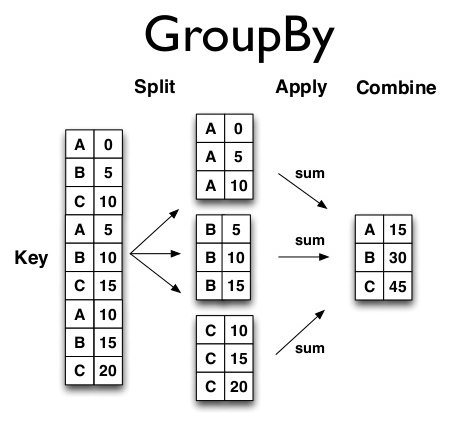

**ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С ОДНОЙ АГРЕГАЦИЕЙ**

Применим агрегирующую функцию среднего к результату работы **groupby()**. В качестве столбца для группировки возьмём столбец типа объекта недвижимости **(Type)**:

In [ ]:
melb_df.groupby(by='Type').mean()

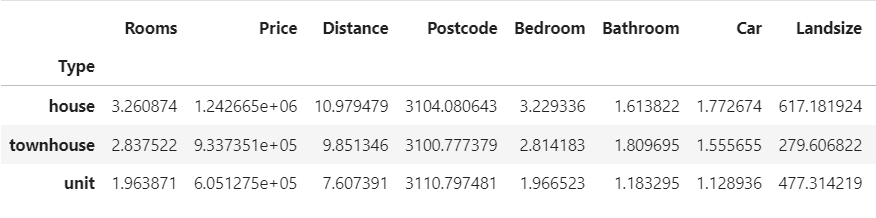

Мы получили таблицу, на пересечении строк и столбцов которой находятся средние значения каждого числового признака в наших данных.

Обратите внимание на структуру получившейся таблицы: теперь на месте индексов стоят значения типа объекта недвижимости **Type (house, townhouse, unit)**.

**Примечание**. Если мы хотим видеть тип объекта в качестве отдельного столбца таблицы, мы можем выставить параметр **as_index на False**:



Как правило, нам не нужна информация обо всех столбцах, поэтому агрегирующие методы можно применять только к интересующему нас столбцу. Например, давайте сравним средние цены на объекты в зависимости от их типа:

In [17]:
melb_df.groupby('Type')['Price'].mean()

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

Из этой маленькой таблицы видно, что наибольшей средней ценой обладают объекты типа house (дома, коттеджи, виллы). Следовательно, можно сделать вывод, что тип постройки является значимым фактором при определении цены объекта недвижимости.

Теперь выясним, какие регионы (Regionname) наиболее удалены от центра Мельбурна.

Для этого найдём минимальное значение расстояния от центра города до объекта в зависимости от его региона. Результат отсортируем по убыванию расстояния:

In [18]:
melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

Итак, наиболее удалёнными являются все регионы **Victoria**.

**ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С НЕСКОЛЬКИМИ АГРЕГАЦИЯМИ**

Чтобы рассчитать несколько агрегирующих методов, можно воспользоваться методом **agg()**, который принимает список строк с названиями агрегаций.

Построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости **(Price)**, сгруппированных по номеру месяца продажи **(MonthSale)**. Результат отсортируем по количеству продаж в порядке убывания:

In [19]:
melb_df.groupby('MonthSale')['Price'].agg(
    ['count', 'mean', 'max']
).sort_values(by='count', ascending=False)

,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


**Примечание**. В результате мы получаем объект **DataFrame**.

В результате применения метода **agg()**, в который мы передали список с названиями интересующих нас агрегирующих функций, мы получаем **DataFrame** со столбцами **count**, mean и max**, где для каждого месяца рассчитаны соответствующие параметры. Результат сортируем по столбцу **count**.

**Примечание**. Если нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом **agg()**, передав в качестве его параметра строку **'describe'**:

In [20]:
melb_df.groupby('MonthSale')['Price'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
MonthSale,,,,,,,,
1,278.0,9.397921e+05,577668.924214,170000.0,570500.0,795000.0,1111250.0,5200000.0
2,333.0,1.169051e+06,671564.357417,131000.0,710000.0,1020000.0,1478000.0,4735000.0
3,1408.0,1.146762e+06,709573.596867,85000.0,680000.0,945000.0,1400000.0,5600000.0
4,1246.0,1.050479e+06,591892.902979,145000.0,655000.0,905500.0,1298750.0,5500000.0
5,1644.0,1.097807e+06,668492.867996,145000.0,650000.0,905000.0,1371250.0,8000000.0
6,1469.0,1.068981e+06,606010.069052,222000.0,660000.0,900000.0,1325000.0,7650000.0
7,1835.0,9.314698e+05,537390.803161,190000.0,586750.0,800000.0,1150000.0,9000000.0
8,1850.0,1.056371e+06,619617.476541,160000.0,635000.0,892000.0,1310000.0,6500000.0
9,1188.0,1.126349e+06,608734.690742,170000.0,725000.0,980000.0,1360000.0,6400000.0


После базовых математических функций наиболее частым агрегированием является подсчёт числа уникальных значений. Так, например, мы можем вычислить число уникальных риелторских компаний в зависимости от региона, чтобы понять, в каких регионах конкуренция на рынке недвижимости меньше. Это можно сделать, передав в параметр метода **agg()** строку **'nunique'**. 

Более того, метод **agg()** поддерживает использование и других функций. Передадим дополнительно встроенную функцию **set**, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

In [21]:
melb_df.groupby('Regionname')['SellerG'].agg(
    		['nunique', set]
)

,nunique,set
Regionname,,
Eastern Metropolitan,26,"{C21, Buxton, other, HAR, McGrath, Kay, Fletch..."
Eastern Victoria,11,"{C21, hockingstuart, other, Barry, Harcourts, ..."
Northern Metropolitan,40,"{Sweeney, C21, other, Collins, HAR, McGrath, K..."
Northern Victoria,11,"{Raine, hockingstuart, other, Barry, YPA, LITT..."
South-Eastern Metropolitan,25,"{C21, Buxton, other, Thomson, HAR, McGrath, Gr..."
Southern Metropolitan,38,"{C21, Buxton, other, Collins, Thomson, HAR, Mc..."
Western Metropolitan,34,"{Sweeney, C21, other, HAR, McGrath, Greg, Vill..."
Western Victoria,6,"{Raine, hockingstuart, other, YPA, HAR, Ray}"


Как и ожидалось, наименьшая конкуренция в наиболее удалённом регионе **Western Victoria**, а наибольшая - в центральном районе **Northern Metropolitan**.

***Задание 3.1***

Сгруппируйте данные по признаку количества комнат и найдите среднюю цену объектов недвижимости в каждой группе. В качестве ответа запишите количество комнат, для которых средняя цена наибольшая.

In [22]:
melb_df.groupby('Rooms')['Price'].mean().sort_values(ascending=False)

Rooms
7     1.920700e+06
5     1.870260e+06
6     1.849366e+06
8     1.602750e+06
4     1.445282e+06
3     1.076081e+06
10    9.000000e+05
2     7.750812e+05
1     4.338245e+05
Name: Price, dtype: float64

***Задание 3.2***

Какой регион имеет наименьшее стандартное отклонение по географической широте **(Lattitude)**?
В качестве ответа запишите название этого региона.

In [23]:
melb_df.groupby('Regionname')['Lattitude'].std().sort_values()

Regionname
Western Victoria              0.011579
Southern Metropolitan         0.043080
Eastern Metropolitan          0.047890
Northern Metropolitan         0.049639
Western Metropolitan          0.051251
South-Eastern Metropolitan    0.073411
Northern Victoria             0.084455
Eastern Victoria              0.147067
Name: Lattitude, dtype: float64

***Задание 3.3***

Какая риелторская компания **(SellerG)** имеет наименьшую общую выручку за период **с 1 мая по 1 сентября (включительно) 2017 года**?
Для ответа на этот вопрос рассчитайте сумму продаж **(Price)** каждой компании в заданный период.
Не забудьте перевести даты в формат **datetime**.

In [24]:
date1 = pd.to_datetime('2017-05-01')
date2 = pd.to_datetime('2017-09-01')
mask = (date1 <= melb_df['Date']) & (melb_df['Date']<= date2)
melb_df[mask].groupby('SellerG')['Price'].sum().sort_values(ascending=True)

SellerG
LITTLE             2742000.0
Cayzer             4439000.0
Burnham            4550500.0
Moonee             7328000.0
Thomson            8332000.0
Bells              8656000.0
Alexkarbon        10985000.0
McDonald          14637500.0
Rendina           15422276.0
Nick              16890000.0
Douglas           18341000.0
Buckingham        19033000.0
C21               19515000.0
Eview             19791500.0
Collins           20217000.0
Philip            22051800.0
Chisholm          23225000.0
Williams          23297000.0
Love              23365500.0
Purplebricks      23401000.0
O'Brien           23855508.0
HAR               25568000.0
Village           26473000.0
RW                29261000.0
Raine             30687700.0
Stockdale         35409800.0
Sweeney           36882750.0
Gary              39138400.0
Hodges            43231000.0
YPA               46354350.0
Miles             47582000.0
Kay               48569500.0
RT                50498000.0
Brad              55955000.0
Jas   

**4. Сводные таблицы**

**МЕТОД GROUPBY КАК СПОСОБ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ**

На самом деле уже строили простейшие одномерные сводные таблицы с помощью метода **groupby** - рассматривали сводную таблицу в контексте группировки по одному признаку. 

**Например**, уже умеем строить таблицу, которая показывает зависимость медианной цены и площади здания от числа комнат:

In [25]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


Также можно построить таблицу, в которой мы будем учитывать не только число комнат, но и тип здания **(Type)**. Для этого в параметрах метода **groupby()** укажем список из нескольких интересующих нас столбцов.

In [26]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
       unit                  NaN
6      house        1.869508e+06
       townhouse             NaN
       unit         5.200000e+05
7      house        1.920700e+06
       townhouse             NaN
       unit                  NaN
8      house        1.510286e+06
       townhouse             NaN
       unit         2.250000e+06
10     house        9.000000e+05
       townhouse             NaN
       unit                  NaN
Name: Price, dtype: float64

В результате выполнения такого кода мы получаем **Series**, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень - тип здания. Такая организация индексов называется **иерархической**.

Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй - по столбцам), а не в виде **Series** с иерархическими индексами, к результату чаще всего применяют метод **unstack()**, который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [27]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

Type,house,townhouse,unit
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
5,1.877327e+06,1.035000e+06,NaN
6,1.869508e+06,NaN,5.200000e+05
7,1.920700e+06,NaN,NaN
8,1.510286e+06,NaN,2.250000e+06
10,9.000000e+05,NaN,NaN


В результате мы получаем сводную таблицу, столбцы в которой представляют типы домов **(house, townhouse, unit)**, строки - число комнат, а на пересечении строк и столбцов находится средняя стоимость объекта с такими показателями.

**МЕТОД PIVOT_TABLE ДЛЯ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ**

На самом деле метод **groupby** редко используется при двух параметрах, так как для построения сводных таблиц существует специальный и более простой метод - **pivot_table()**.

**Основные параметры метода pivot_table()**

→ **values** - имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;

→ **index** - имя столбца, значения которого станут строками сводной таблицы;

→ **columns** - имя столбца, значения которого станут столбцами сводной таблицы;

→ **aggfunc** - имя или список имён агрегирующих функций (по умолчанию - подсчёт среднего, **'mean'**);

→ **fill_value** - значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

Построим ту же самую таблицу, но уже с использованием метода **pivot_table**. В качестве параметра **values** укажем столбец **Price**, в качестве индексов сводной таблицы возьмём **Rooms**, а в качестве столбцов - **Type**. Агрегирующую функцию оставим по умолчанию **(среднее)**. Дополнительно заменим пропуски в таблице на значение **0**. Финальный результат для наглядности вывода округлим с помощью метода **round()** до целых.

In [28]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',    fill_value=0
).round()

Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


Несложно понять, что метод **pivot_table()** имеет преимущество перед группировкой по нескольким критериям. Оно заключается в наличии специальных аргументов для строк и столбцов сводной таблицы, благодаря чему уменьшается вероятность запутаться при построении более сложных (многомерных) сводных таблиц.

Проанализируем продажи в каждом из регионов в зависимости от того, будний был день или выходной. Для этого построим сводную таблицу, в которой строками будут являться названия регионов **(Regionname)**, а в столбцах будет располагаться наш **«признак-мигалка»** выходного дня **(Weekend)**, который равен **1**, если день был выходным, и **0** - в противном случае. В качестве значений сводной таблицы возьмём количество продаж.

In [29]:
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
)

Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


**Разберём ещё один пример:** найдём, как зависит средняя и медианная площадь участка **(Landsize)** от типа объекта **(Type)** и его региона **(Regionname)**. Чтобы посмотреть несколько статистических параметров, нужно передать в аргумент **aggfunc** список из агрегирующих функций. Построим такую сводную таблицу, где пропущенные значения заменим на **0**:

In [30]:
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

**МНОГОМЕРНЫЕ СВОДНЫЕ ТАБЛИЦЫ**

До этого мы рассматривали, как некоторый статистический показатель может зависеть от двух признаков. Однако, как уже упоминалось, сводные таблицы позволяют наблюдать зависимость и от большего числа признаков. Такие сводные таблицы называются **многомерными**. 

Для того чтобы исследовать зависимость от большего числа признаков, можно передать список признаков в параметр **index** или параметр **columns**.

Построим таблицу, в которой по индексам будут располагаться признаки метода продажи **(Method)** и типа объекта **(Type)**, по столбцам - наименование региона **(Regionname)**, а на пересечении строк и столбцов будет стоять медианная цена объекта **(Price)**:

In [31]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                   1244000            780000   
       townhouse                760000                 0   
       unit                     650000                 0   
S      house                   1127000            675000   
       townhouse                828000                 0   
       unit                     645750            492000   
SA     house                    932500            950000   
       townhouse                807500                 0   
       unit                          0                 0   
SP     house                   1050000            672500   
       townhouse                910000                 0   
       unit                     515000            400000   
VB     house                   1100000            712500   
       townhouse                892500                 0   
       unit                     500000                 0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                     900000             500000   
       townhouse                 632500                  0   
       unit                      410000                  0   
S      house                     920000             555000   
       townhouse                 750000                  0   
       unit                      525500                  0   
SA     house                     817500             540000   
       townhouse                 425000                  0   
       unit                      616000                  0   
SP     house                     900000             521000   
       townhouse                 690000                  0   
       unit                      470000                  0   
VB     house                    1050000             690000   
       townhouse                 640000                  0   
       unit                      450000                  0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                          865000                1725000   
       townhouse                     1190000                1055000   
       unit                           525000                 571250   
S      house                          883300                1611000   
       townhouse                      875000                1135000   
       unit                           606000                 655000   
SA     house                          880000                1390000   
       townhouse                           0                1141000   
       unit                                0                 580000   
SP     house                          770000                1521750   
       townhouse                      800000                1162500   
       unit                           601000                 550000   
VB     house                          850000                1800000   
       townhouse                           0                1250000   
       unit                           700000                 500000   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                    870000            630000  
       townhouse                670000                 0  
       unit                     360000                 0  
S      house                    870000            397500  
       townhouse                729000                 0  
       unit                     489000                 0  
SA     house                    772500                 0  
       townhouse                467500                 0  
       unit                     571000                 0  
SP     house                    865000            360000  
       t

**ДОСТУП К ДАННЫМ В СВОДНОЙ ТАБЛИЦЕ**

Запишем сводную таблицу, которую мы создавали ранее в переменную **pivot**:

In [34]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)
pivot.columns

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

В результате мы получаем объект **MultiIndex**. Этот объект хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), то есть есть шесть возможных вариантов обращения к столбцам таблицы.

**Мультииндексы** раскрываются подобно вложенным словарям - по очереди, как матрёшка. Чтобы получить доступ к определённому столбцу, вы должны сначала обратиться к столбцу, который находится уровнем выше.

Так, из таблицы **pivot** мы можем получить средние значения площадей участков для типа здания **unit**, просто последовательно обратившись по имени столбцов:

In [35]:
display(pivot['mean']['unit'])

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

Аналогично производится и **фильтрация данных**. Например, если нам нужны регионы, в которых средняя площадь здания для домов типа **house** меньше их медианной площади, то мы можем найти их следующим образом:

In [36]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

median                       mean              \
Type                   house townhouse unit       house   townhouse   
Regionname                                                            
Southern Metropolitan  586.0     246.0    0  569.643881  278.858824   
Western Metropolitan   531.0     198.0   62  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

Чтобы получить индексы отфильтрованной таблицы, можно воспользоваться атрибутом **index** и обернуть результат в список:

In [37]:
print(list(filtered_pivot.index))

['Southern Metropolitan', 'Western Metropolitan']


Таким образом, сводные таблицы изначально кажутся сложной структурой, но на самом деле это обычные **DataFrame** со вложенными индексами строк или столбцов. 

Умение читать и анализировать сложные сводные таблицы - это важный навык, который помогает проводить углублённый анализ данных.

Примечание. На самом деле мультииндексные таблицы можно создавать и вручную. Давайте посмотрим на синтаксис данной конструкции:

In [38]:
import numpy as np
mser = pd.Series(
    np.random.rand(8),
	index=[['white','white','white','blue','blue','red','red','red'], 
           ['up','down','right','up','down','up','down','left']])
display(mser)

white  up       0.514874
       down     0.873864
       right    0.667375
blue   up       0.434542
       down     0.437908
red    up       0.646968
       down     0.337607
       left     0.935176
dtype: float64

В данном примере мы создаём объект **Series** со вложенными индексами. Мы передаём в качестве индексов **Series** вложенный список, где первый список задаёт внешний уровень вложенности, а второй список - внутренний уровень вложенности. Значения **Series** - случайные числа от 0 до 1, сгенерированные функцией **np.random.rand()**.

Если посмотреть на индексы **Series**, можно увидеть, что они являются мультииндексами:

In [39]:
print(mser.index)

MultiIndex([('white',    'up'),
            ('white',  'down'),
            ('white', 'right'),
            ( 'blue',    'up'),
            ( 'blue',  'down'),
            (  'red',    'up'),
            (  'red',  'down'),
            (  'red',  'left')],
           )


Аналогично создаются **DataFrame** со вложенными признаками (вложенными столбцами) - для этого вложенный список передаётся в параметр **columns** при инициализации таблицы:

In [40]:
mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index=[['white','white','red','red'], ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up   -0.143911  0.399856 -2.216485  0.286303
      down -0.399730  0.209089  0.769263 -1.540428
red   up    0.853015 -0.148850 -1.099086  0.201183
      down  0.275020 -0.175892 -0.857120 -0.272571

***Задание 4.2***

Составьте сводную таблицу, которая показывает зависимость медианной площади **(BuildingArea)** здания от типа объекта недвижимости **(Type)** и количества жилых комнат в доме **(Rooms)**. Для какой комбинации признаков площадь здания наибольшая?
В качестве ответа запишите эту комбинацию (тип здания, число комнат) через запятую, без пробелов.

In [41]:
pivot = melb_df.pivot_table(
    values='BuildingArea',
    index='Type',
    columns='Rooms',
    aggfunc='median',
    fill_value=0
)
display(pivot)

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126,126,141.0,177,126,216.5,126,126
townhouse,88.0,114,126,159.5,152,0,0.0,0,0
unit,69.5,110,126,126.0,0,171,0.0,126,0


***Задание 4.3***

Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости **(Price)** от риелторского агентства **(SellerG)** и типа здания **(Type)**.
Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа **unit** максимальна. В качестве ответа запишите название этого агентства.

In [42]:
pivot = melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc='median',
)
max_unit_price = pivot['unit'].max()
print(pivot[pivot['unit'] == max_unit_price].index[0])

Nick


**5. Объединение DataFrame: знакомимся с новыми данными**

**Наши данные представляют собой четыре таблицы:**

**1.** **ratings1** и **ratings2** - таблицы с данными о выставленных пользователями оценках фильмов. Они имеют одинаковую структуру и типы данных - на самом деле это две части одной таблицы с оценками фильмов.

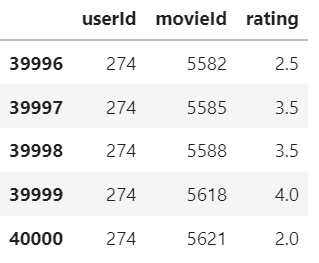

→ **userId** - уникальный идентификатор пользователя, который выставил оценку;

→ **movieId** - уникальный идентификатор фильма;

→ **rating** - рейтинг фильма.

**2.** **dates** - таблица с датами выставления всех оценок.

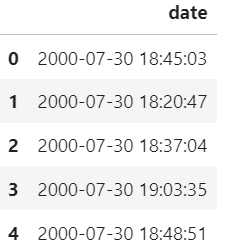

**date** - дата и время выставления оценки фильму.

**3.** **movies** - таблица с информацией о фильмах.

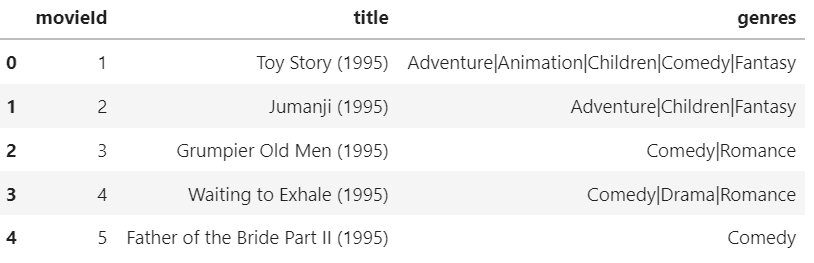

→ **movieId** - уникальный идентификатор фильма;

→ **title** - название фильма и год его выхода;

→ **genres** - жанры фильма.

Итак, представим, что нам надо получить единую таблицу, в которой будут собраны рейтинги, даты выставления рейтингов, а также информация о фильмах. Вот как мы будем действовать:

**1.** Склеим таблицы **ratings1** и **ratings2** в единую структуру.

*Термин **«склеить»** в данном случае обозначает **конкатенацию** - присоединение одной таблицы к другой.*

**2.** К полученной таблице с рейтингами подсоединим столбец с датой проставления рейтинга, склеив столбцы таблиц между собой.

**3.** Присоединим к нашей таблице информацию о названиях и жанрах фильмов.

**6. Объединение DataFrame: concat**

Следуя нашему плану объединения таблиц, первым делом мы должны склеить таблицы **ratings1** и **ratings2** по строкам.

Для этого воспользуемся встроенной функцией Pandas **concat()**, которая позволяет склеивать (конкатенировать) таблицы как по строкам, так и по столбцам.

**Основные параметры функции concat()**

→ **objs** - список объектов **DataFrame ([df1, df2,…])**, которые должны быть сконкатенированы;

→ **axis** - ось определяет направление конкатенации: **0** - конкатенация по строкам (по умолчанию), **1** - конкатенация по столбцам;

→ **join** - либо **inner** (пересечение), либо **outer** (объединение); рассмотрим этот момент немного позже;

→ **ignore_index** - по умолчанию установлено значение **False**, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных.

Если установлено значение **True**, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру - идентичное число и имена столбцов.

Итак, склеим  **ratings1** и **ratings2** по строкам, так как они имеют одинаковую структуру столбцов. Для этого передадим их списком в функцию **concat()**. Помним, что параметр **axis** по умолчанию равен **0**, объединение происходит по строкам, поэтому не трогаем его. 

**Примечание**. Обратите внимание, что **concat** является функцией библиотеки, а не методом **DataFrame**. Поэтому её вызов осуществляется как **pd.concat(...).**

In [6]:
import pandas as pd

movies = pd.read_csv('data/movies_data/movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [11]:
ratings1 = pd.read_csv('data/movies_data/ratings1.csv')
ratings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40001 entries, 0 to 40000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   40001 non-null  int64  
 1   movieId  40001 non-null  int64  
 2   rating   40001 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 937.6 KB


In [9]:
ratings2 = pd.read_csv('data/movies_data/ratings2.csv')
ratings2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60836 entries, 0 to 60835
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   60836 non-null  int64  
 1   movieId  60836 non-null  int64  
 2   rating   60836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [10]:
dates = pd.read_csv('data/movies_data/dates.csv')
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    100836 non-null  object
dtypes: object(1)
memory usage: 787.9+ KB


In [12]:
ratings = pd.concat([ratings1, ratings2])
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
60831,610,166534,4.0
60832,610,168248,5.0
60833,610,168250,5.0
60834,610,168252,5.0


В результате мы увеличили первую таблицу, добавив снизу строки второй таблицы.

На первый взгляд может показаться, что всё прошло успешно, однако если мы посмотрим на индексы последних строк таблицы, то увидим, что их нумерация не совпадает с количеством строк. Это может привести к некорректному объединению таблиц по ключевым столбцам на следующем этапе решения нашей задачи.

Это связано с тем, что по умолчанию **concat** сохраняет первоначальные индексы объединяемых таблиц, а обе наши таблицы индексировались, начиная от **0**. Чтобы создать новые индексы, нужно выставить параметр **ignore_index** на **True**:

In [13]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100832,610,166534,4.0
100833,610,168248,5.0
100834,610,168250,5.0
100835,610,168252,5.0


Казалось бы, совсем другое дело! Но это ещё не всё. Давайте узнаем количество строк в таблицах **ratings** и **dates**, ведь нам предстоит вертикально склеить их между собой:

In [14]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0])

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
False


Размерность таблиц разная - как такое могло произойти?

На самом деле очень просто: при выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы **(ratings1 и ratings2)**. В результате конкатенации случилось дублирование строк. В данном примере их легко найти - выведем последнюю строку таблицы **ratings1** и первую строку таблицы **ratings2**:

In [15]:
display(ratings1.tail(1))
display(ratings2.head(1))

,userId,movieId,rating
40000,274,5621,2.0


,userId,movieId,rating
0,274,5621,2.0


Чтобы очистить таблицу от дублей, мы можем воспользоваться методом **DataFrame drop_duplicates()**, который удаляет повторяющиеся строки в таблице. Не забываем обновить индексы после удаления дублей, выставив параметр **ignore_index** в методе **drop_duplicates()** на значение **True**:

In [16]:
ratings = ratings.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', ratings.shape[0])

Число строк в таблице ratings:  100836


Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы **ratings** и **dates** по столбцам:

In [17]:
ratings_dates = pd.concat([ratings, dates], axis=1)
display(ratings_dates.tail(7))

,userId,movieId,rating,date
100829,610,164179,5.0,2017-05-03 21:07:11
100830,610,166528,4.0,2017-05-04 06:29:25
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15


Итак, мы смогли создать единую таблицу с рейтингами и датами их представления. Нашим следующим шагом будет присоединить к таблице информацию о фильмах из таблицы **movies**.

**7. Объединение DataFrame: join, merge**

У таблиц **ratings** и **movies** есть общий столбец **movieId**, который каждому фильму из таблицы **movies** ставит в соответствие поставленные ему оценки из таблицы **ratings**. Мы хотим объединить их в единую структуру согласно этому соответствию. Объединения такого рода часто называют объединением по ключевому столбцу.

**ТИПЫ ОБЪЕДИНЕНИЙ**

Типы объединений в **Pandas** тесно связаны с операцией **join из SQL**, которую мы будем рассматривать в курсе в дальнейшем.

Они представлены на схеме ниже в виде кругов Эйлера. 

**Круги Эйлера** - это геометрический способ отобразить отношения между множествами. Мы уже сталкивались с базовыми операциями между множествами (пересечением, объединением и вычитанием), когда говорили о множествах в модуле **PYTHON-2**.

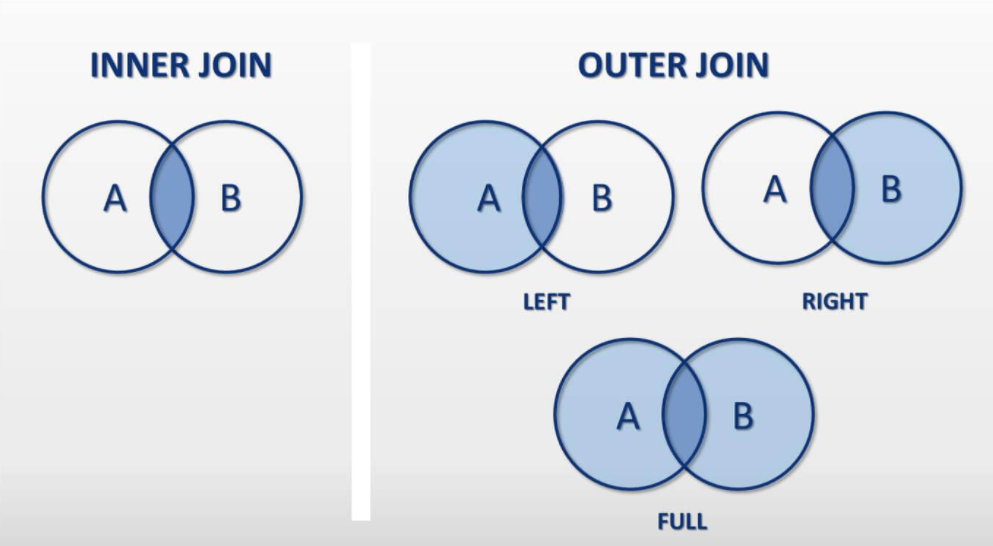

Прежде чем мы перейдём к дальнейшей работе с таблицами о фильмах, рассмотрим два основных типа объединения таблиц:

**1.** **inner (внутреннее)**

При использовании такого типа объединения в результирующей таблице остаются только те записи, которые есть в обеих таблицах.

*Аналогия в теории множеств*

*Пересечение (intersection) множеств А и В.*

Строки, для которых совпадение не было найдено, удаляются.

**2.** **outer (внешнее)**

**Данный тип делится на три подтипа:**

**1.** **full** - используется как **outer** по умолчанию, объединяет все варианты в обеих таблицах.

*Аналогия в теории множеств*

*Объединение (union) множеств А и В.*

**2.** **left** - для всех записей из «левой» таблицы (например, **ratings**) ведётся поиск соответствий в «правой» (например, **movies**). В результирующей таблице останутся только те значения, которым были найдены соответствия, то есть только значения из **ratings**.

*Аналогия в теории множеств*

*Вычитание (difference) множества B из результата объединения (union) множеств А и В.*

**3.** **right** - аналогично предыдущему, но остаются значения только из «правой» таблицы. 

*Аналогия в теории множеств*

*Вычитание (difference) множества А из результата объединения (union) множеств А и В.*

**Во всех трёх случаях, если совпадений между таблицами не найдено, на этом месте ставится пропуск (NaN).**

**МЕТОД ОБЪЕДИНЕНИЯ JOIN**

Для объединения двух таблиц по индексам используется метод DataFrame **join()**. Однако данный метод можно применить и для того, чтобы объединить таблицы по ключевому столбцу (в нашем случае это **movieId**).

**Основные параметры метода join()**

→ **other** - таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».

→ **how** - параметр типа объединения. Он может принимать значения **'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer)**. По умолчанию параметр установлен на **'left'**.

→ **on** - параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».

→ **lsuffix** и **rsuffix** - дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

**Ниже представлена общая схема работы метода join() в зависимости от типа объединения:**

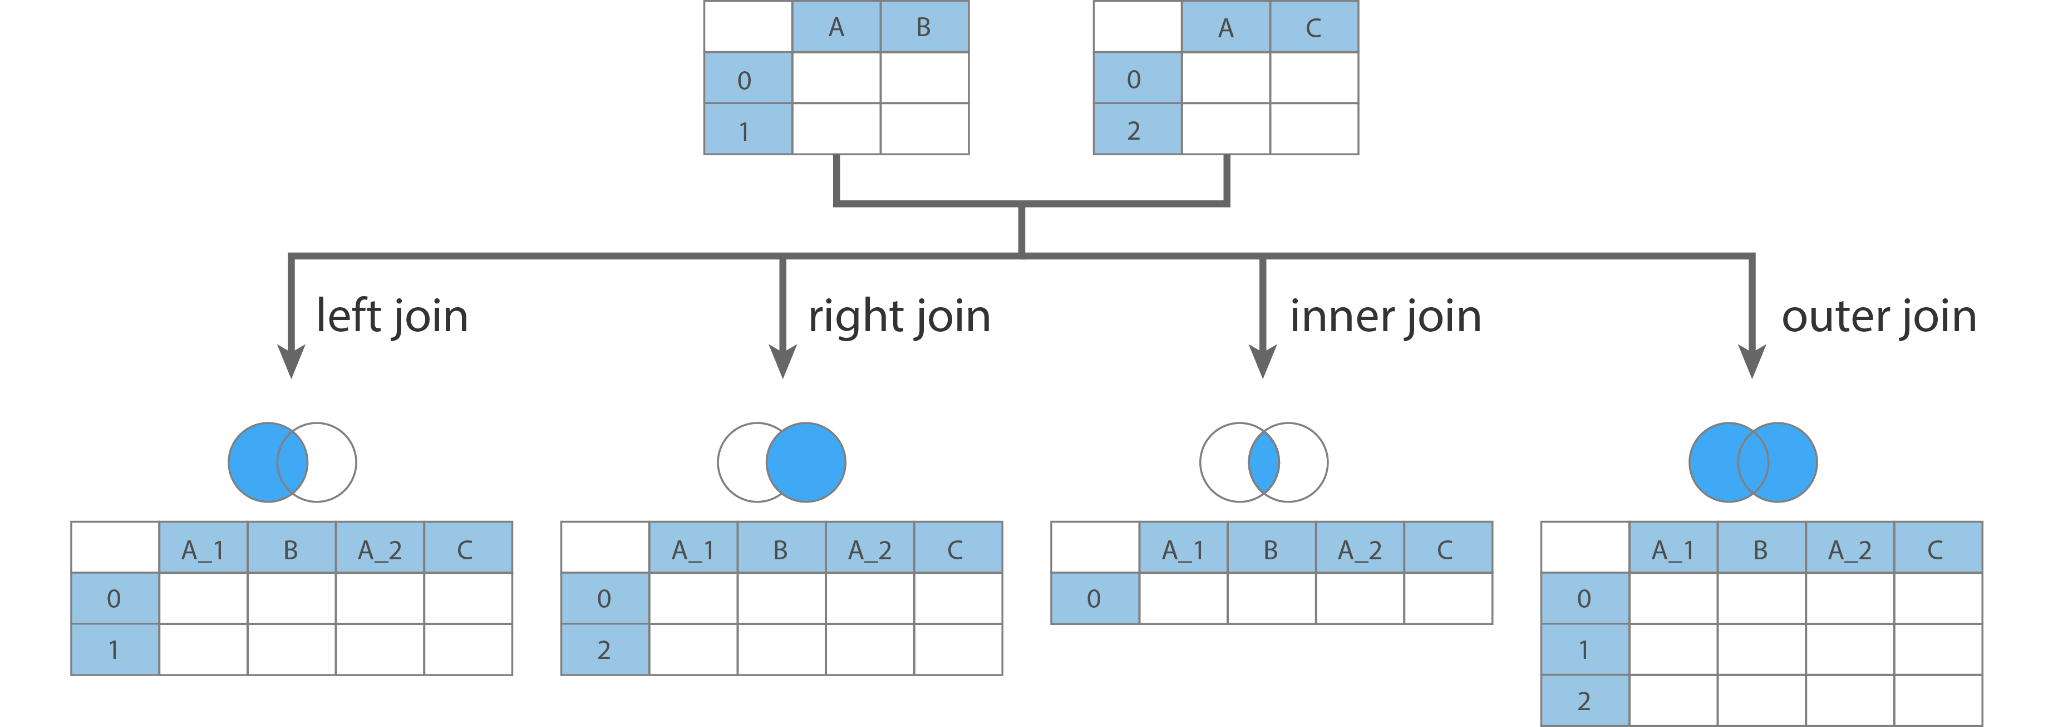

Если использовать метод **join()** «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано - по индексам двух таблиц согласно установленному типу объединения.

Проверим это, объединив таблицы типом **left**. Так как в наших таблицах есть одноимённые столбцы, установим один из суффиксов, чтобы избежать ошибки:

In [20]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='left'
)
display(joined_false)

,userId,movieId,rating,date,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,NaN,NaN,NaN
100832,610,168248,5.0,2017-05-03 22:21:31,NaN,NaN,NaN
100833,610,168250,5.0,2017-05-08 19:50:47,NaN,NaN,NaN
100834,610,168252,5.0,2017-05-03 21:19:12,NaN,NaN,NaN


При объединении таблиц по индексам в результирующую таблицу попали все строки из «левой» таблицы, а недостающие строки из «правой» были заполнены пропусками. Так работает тип объединения **left**.

Чтобы совместить таблицы по ключевому столбцу с помощью метода **join()**, необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода **set_index()**. Также необходимо указать название ключа в параметре **on**.

In [21]:
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


В результате такого объединения для каждого идентификатора фильма **movieId** в таблице **ratings_dates** найден совпадающий с ним идентификатор **movieId** в таблице **movies** и присоединена информация о самом фильме **(title и genres)**.

Обратите внимание, что в результате такого объединения остался лишь один столбец **movieId**.

**Примечание**. **Join()** также можно использовать с параметром **how='outer'**.

**МЕТОД ОБЪЕДИНЕНИЯ MERGE**

Аналогично предыдущему, метод **merge()** предназначен для слияния двух таблиц по ключевым столбцам или по индексам. Однако, в отличие от **join()**, метод **merge()** предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

**Основные параметры метода merge()**

→ **right** - присоединяемая таблица. По умолчанию она является «правой».

→ **how** - параметр типа объединения. По умолчанию принимает значение **'inner'**.

→ **on** - параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.

→ **left_on** - если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.

→ **right_on** - аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

Метод **merge()** в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, **merge()** проще в использовании и более многофункционален, чем схожие методы.

Посмотрим на метод **merge()** в действии. Произведём слияние наших таблиц и получим ту же таблицу, что и ранее:

In [22]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)
display(merged.head())


,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Проверим, что число строк в таблице **ratings_dates** совпадает с числом строк в результирующей таблице merged:

In [23]:
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])

Число строк в таблице ratings_dates:  100836
Число строк в таблице merged:  100836
True


**ОСОБЕННОСТИ ИСПОЛЬЗОВАНИЯ MERGE()**

Возникает вопрос: почему мы выбрали тип объединения **left**, а не **full**, например?

Найти ответ нам поможет пример. Объединим **ratings_dates** с **movies** по ключевому столбцу **movieId**, но с параметром **how='outer' (full outer)** и выведем размер таблицы, а также её «хвост»:

In [24]:
merged2 = ratings_dates.merge(
    movies,
    on='movieId',
    how='outer'
)
print('Число строк в таблице merged2: ', merged2.shape[0])
display(merged2.tail())

Число строк в таблице merged2:  100854


,userId,movieId,rating,date,title,genres
100849,NaN,30892,NaN,NaN,In the Realms of the Unreal (2004),Animation|Documentary
100850,NaN,32160,NaN,NaN,Twentieth Century (1934),Comedy
100851,NaN,32371,NaN,NaN,Call Northside 777 (1948),Crime|Drama|Film-Noir
100852,NaN,34482,NaN,NaN,"Browning Version, The (1951)",Drama
100853,NaN,85565,NaN,NaN,Chalet Girl (2011),Comedy|Romance


**Результирующее число строк в таблице увеличилось. Но за счёт чего?**

Оказывается, в таблице **movies** содержались фильмы, которым ещё не были выставлены оценки. В результате объединения типом **full outer** информация о фильмах перенеслась из таблицы **movies** в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы **ratings_dates** заполнились пропусками **(NaN)**. Такие фильмы были записаны в конец таблицы.

**Важно! Учитывайте такие нюансы при работе с несколькими таблицами и всегда проверяйте результат объединения.**

Метод **merge()** с внешним **(outer)** типом объединения может использоваться как аналог метода **concat()** при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.

Рассмотрим пример: объединим таблицы **ratings1 и ratings2**, как мы уже делали раньше, но теперь используем метод **merge()**:

In [25]:
merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

Число строк в таблице merge_ratings:  100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


Обратите внимание, что при использовании метода **merge()** для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода **concat()**. Это особенность метода **merge()** - автоматическое удаление дублей.

**КАКОЙ МЕТОД ОБЪЕДИНЕНИЯ ИСПОЛЬЗОВАТЬ?**

Итак, мы рассмотрели три основных метода объединения таблиц: **concat()**, **join()** и **merge()**. Давайте структурируем материал, изложенный ранее, в виде небольшой блок-схемы, которая поможет вам определить, какой метод является предпочтительным при объединении таблиц.



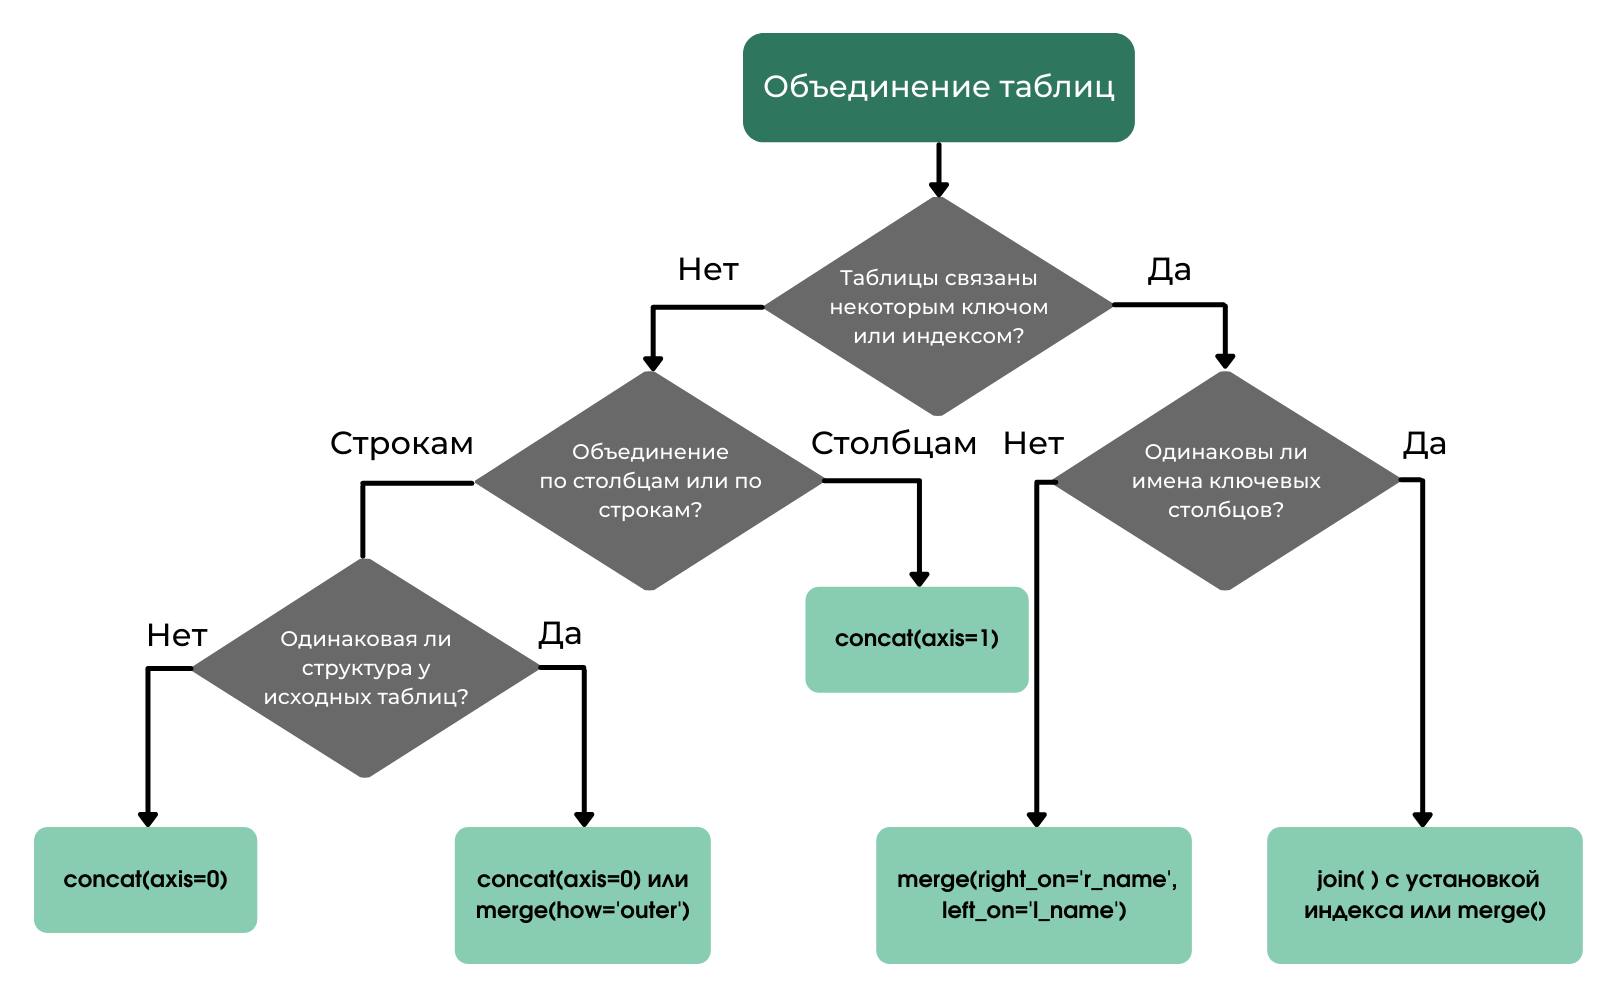